# CSE 284 Final Project - Comparison of Relative Finding Methods

### Imports

In [7]:
import pandas as pd
import vcf
import os
import subprocess
import numpy as np
import matplotlib.pyplot as plt

# Part 1 - Subpopulations

### Sample List Generation
Here, I generate sample lists by utilizing `igsr_samples.tsv` to gather a list of samples for each subpopulation and storing them in their own respective .txt file in `/samples`. Of all possible subpopulations, `MKK`, `GWF`, `GWW`, and `GWJ` were excluded due to their sample lists being empty when generated.

In [16]:
chr_num = 19
pruned = True
if pruned:
    vcf_file = "../public/1000Genomes/1000G_chr" + str(chr_num) + "_pruned.vcf.gz"
else:
    vcf_file = "../public/1000Genomes/ALL.chr" + str(chr_num) + ".phase3_shapeit2_mvncall_integrated_v5a.20130502.genotypes.vcf.gz"
    
all_samples = vcf.Reader(filename=vcf_file).samples

In [10]:
df = pd.read_csv("../public/1000Genomes/igsr_samples.tsv", sep='\t')
pop_codes = list(set(df['Population code'].tolist()))
pop_codes = [x for x in pop_codes if len(str(x)) == 3 and not pd.isna(x)]
print(pop_codes)

if "samples" not in os.listdir():
    os.mkdir("samples")
if "samples_singular" not in os.listdir():
    os.mkdir("samples_singular")

for pop in pop_codes:
    subset = df[df['Population code'] == pop]
    subset = subset[subset['Sample name'].isin(all_samples)]
    subset['copy'] = subset['Sample name']
    subset['Sample name'].to_csv('samples_singular/samples_singular_' + pop.lower() + '.txt', sep=' ', header=False, index=False)
    subset[['Sample name', 'copy']].to_csv('samples/samples_' + pop.lower() + '.txt', sep=' ', header=False, index=False)

samples_final = []
for file in os.listdir("samples"):
    if os.path.getsize("samples/" + file) == 0:
        print(file)
        os.remove("samples/" + file)
    elif "ipynb" not in file:
        samples_final.append(file[-7:-4])
        
for file in os.listdir("samples_singular"):
    if os.path.getsize("samples_singular/" + file) == 0:
        print(file)
        os.remove("samples_singular/" + file)

['GWD', 'LWK', 'KHV', 'GWJ', 'BEB', 'MXL', 'ESN', 'YRI', 'PEL', 'GWF', 'PUR', 'GIH', 'MSL', 'FIN', 'JPT', 'STU', 'CHB', 'IBS', 'GBR', 'CHS', 'PJL', 'ITU', 'CLM', 'MKK', 'ASW', 'CDX', 'TSI', 'CEU', 'GWW', 'ACB']
samples_mkk.txt
samples_gwf.txt
samples_gww.txt
samples_gwj.txt
samples_singular_mkk.txt
samples_singular_gwf.txt
samples_singular_gww.txt
samples_singular_gwj.txt


### Defining Measurements of Time and Memory Usage
This function is written to take in a command and run it twice such that both the runtime and the peak memory usage can be measured. These are recorded and then returned by the function. There are three extra optional parameters. Setting `run_time` or `run_mem` to `False` will prevent the function from running that respective measurement. Setting the parameter `printout` to `True` will return the measurements to the user in the form of print statements.

In [11]:
def run_time_mem(command, run_time=True, run_mem=True, printout=False):
    time = 0
    mem = 0
    
    if(run_time):
        proc = subprocess.run("bash -c 'time " + command + "'", shell=True, capture_output=True, text=True)
        time_output = proc.stderr.split()
        time = float(time_output[-1][2:-1]) + float(time_output[-3][2:-1])
        if(printout):
            print("time: " + str(time))

    if(run_mem):
        proc = subprocess.run("bash -c './memusg " + command + "'", shell=True, capture_output=True, text=True)
        mem_output = proc.stderr.split()
        mem = mem_output[-2]
        if(printout):
            print("mem : " + str(mem))
    
    return [round(time, 3), int(mem)]

### PLINK - Subpopulation Measurements

In [155]:
if "data" not in os.listdir():
    os.mkdir("data")

if pruned:
    os.system("plink --vcf ../public/1000Genomes/1000G_chr" + str(chr_num) + "_pruned.vcf.gz --make-bed --out data/chr_plink")
else:
    os.system("plink --vcf ../public/1000Genomes/ALL.chr" + str(chr_num) + ".phase3_shapeit2_mvncall_integrated_v5a.20130502.genotypes.vcf.gz --make-bed --out data/chr_plink")

PLINK v1.90b6.9 64-bit (4 Mar 2019)            www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to data/chr_plink.log.
Options in effect:
  --make-bed
  --out data/chr_plink
  --vcf ../public/1000Genomes/1000G_chr19_pruned.vcf.gz

385412 MB RAM detected; reserving 192706 MB for main workspace.
--vcf: data/chr_plink-temporary.bed + data/chr_plink-temporary.bim +
data/chr_plink-temporary.fam written.
17784 variants loaded from .bim file.
2504 people (0 males, 0 females, 2504 ambiguous) loaded from .fam.
Ambiguous sex IDs written to data/chr_plink.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 2504 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 

In [179]:
if "plink" not in os.listdir():
    os.mkdir("plink")

plink_vals = []
for file in os.listdir("samples"):
    if(file[-4:] == ".txt"):
        sample = file[-7:-4]
        print(sample)
        command = "plink --bfile data/chr_plink --keep samples/" + file + " --genome --out plink/" + sample + ".ibd"
        plink_vals.append(run_time_mem(command, printout=True))

print(plink_vals)

khv
time: 0.081
mem : 197399132
gbr
time: 0.069
mem : 197399132
acb
time: 0.06
mem : 197399132
ibs
time: 0.08700000000000001
mem : 197398104
chs
time: 0.067
mem : 197399132
ceu
time: 0.08600000000000001
mem : 197398104
asw
time: 0.025
mem : 197399132
msl
time: 0.051000000000000004
mem : 197399132
pel
time: 0.063
mem : 197399132
lwk
time: 0.089
mem : 197399132
esn
time: 0.093
mem : 197399132
clm
time: 0.06999999999999999
mem : 197399132
pur
time: 0.07
mem : 197399132
stu
time: 0.068
mem : 197399132
yri
time: 0.081
mem : 197399132
fin
time: 0.085
mem : 197399132
beb
time: 0.047
mem : 197399132
cdx
time: 0.066
mem : 197399132
chb
time: 0.069
mem : 197399132
gih
time: 0.093
mem : 197399132
itu
time: 0.079
mem : 197399132
gwd
time: 0.068
mem : 197399132
tsi
time: 0.095
mem : 197399132
mxl
time: 0.056
mem : 197399132
jpt
time: 0.093
mem : 197399132
pjl
time: 0.077
mem : 197399132
[[0.081, 197399132], [0.069, 197399132], [0.06, 197399132], [0.087, 197398104], [0.067, 197399132], [0.086, 19739

### GERMLINE - Subpopulation Measurements

In [181]:
if pruned:
    os.system("bcftools view ../public/1000Genomes/1000G_chr" + str(chr_num) + "_pruned.vcf.gz -O b -o data/chr_plink.bcf")

else:
    os.system("bcftools view ../public/1000Genomes/ALL.chr" + str(chr_num) + ".phase3_shapeit2_mvncall_integrated_v5a.20130502.genotypes.vcf.gz -O b -o chr_plink.bcf")

if "germline" not in os.listdir():
    os.mkdir("germline")
    
germline_vals = []
for file in os.listdir("samples_singular"):
    if(file[-4:] == ".txt"):
        sample = file[-7:-4]
        print(sample)
        os.system("bcftools view -S samples_singular/" + file + " data/chr_plink.bcf -O b -o data/subset_" + sample + ".bcf")
        os.system("vcftools --bcf data/subset_" + sample + ".bcf --plink --out data/out_sub_" + sample + " >/dev/null 2>&1")
        command = "./germline-1-5-3/bin/germline -input data/out_sub_" + sample + ".ped data/out_sub_" + sample + ".map -output germline/" + sample + ".germ"
        germline_vals.append(run_time_mem(command))

print(germline_vals)

ceu
chs
ibs
gbr
acb
khv
lwk
pel
esn
msl
asw
fin
cdx
beb
stu
pur
yri
clm
pjl
jpt
gwd
tsi
mxl
itu
gih
chb
[[0.292, 38496], [0.285, 38496], [0.316, 38628], [0.225, 38760], [0.222, 38892], [0.272, 38496], [0.248, 38892], [0.223, 38628], [0.23, 38892], [0.226, 37440], [0.172, 37440], [0.263, 39024], [0.242, 38892], [0.219, 38628], [0.287, 38496], [0.261, 38628], [0.259, 38628], [0.235, 38892], [0.257, 39024], [0.268, 39024], [0.298, 38496], [0.261, 38760], [0.165, 37440], [0.252, 38892], [0.263, 39024], [0.241, 39024]]


### IBDseq - Subpopulation Measurements

In [ ]:
if "ibdseq" not in os.listdir():
    os.mkdir("ibdseq")

ibdseq_vals = []
for file in os.listdir("samples"):
    if(file[-4:] == ".txt"):
        sample = file[-7:-4]
        print(sample)
        os.system("bcftools view data/subset_" + sample + ".bcf -O v -o data/subset_" + sample + ".vcf")
        
        #-Xmx192706m
        command = "java -jar ibdseq.r1206.jar gt=data/subset_" + sample + ".vcf out=ibdseq/" + sample + ".ibdseq"
        ibdseq_vals.append(run_time_mem(command))

print(ibdseq_vals)

### BEAGLE's fastIBD - Subpopulation Measurements

In [ ]:
if "fastibd" not in os.listdir():
    os.mkdir("fastibd")

fastibd_vals = []
for file in os.listdir("samples"):
    if(file[-4:] == ".txt"):
        sample = file[-7:-4]
        print(sample)
        os.system("cat data/subset_" + sample + ".vcf | java -jar vcf2beagle.jar ? data/subset_" + sample)
        
        command = "java -jar beagle.jar unphased=data/subset_" + sample + ".bgl.gz markers=data/subset_" + sample + ".markers fastibd=true out=fastibd/" + sample + ".fastibd missing=?"
        fastibd_vals.append(run_time_mem(command))

print(fastibd_vals)

### Subpopulation Visualizations

In [184]:
persistent = [plink_vals, germline_vals, ibdseq_vals, fastibd_vals]

with open('persistent.txt', 'w') as file:
    file.write(str(persistent))

In [13]:
with open('persistent.txt', 'r') as file:
    persistent = eval(file.read())

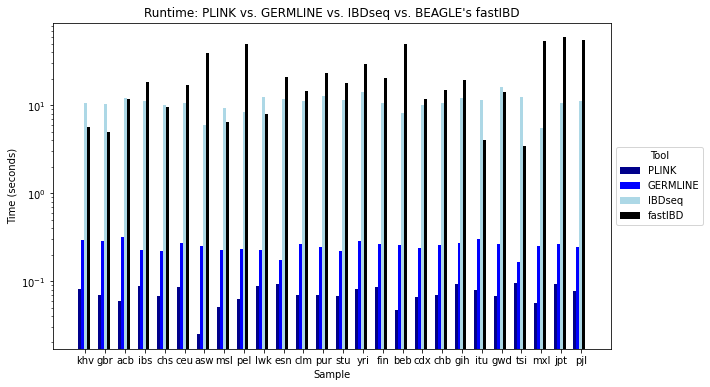

In [15]:
x = np.arange(len(persistent[0]))
y1 = [item[0] for item in persistent[0]]
y2 = [item[0] for item in persistent[1]]
y3 = [item[0] for item in persistent[2]]
y4 = [item[0] for item in persistent[3]]

plt.figure(figsize=(10, 6))
bar_width = 0.15

plt.bar(x, y1, width=bar_width, label='PLINK', color='darkblue')
plt.bar(x + bar_width, y2, width=bar_width, label='GERMLINE', color='blue')
plt.bar(x + bar_width * 2, y3, width=bar_width, label='IBDseq', color='lightblue')
plt.bar(x + bar_width * 3, y4, width=bar_width, label='fastIBD', color='black')

plt.xlabel('Sample')
plt.ylabel('Time (seconds)')
plt.title('Runtime: PLINK vs. GERMLINE vs. IBDseq vs. BEAGLE\'s fastIBD')
labels = samples_final
plt.xticks(x + bar_width * 2, labels)
plt.yscale('log')
plt.legend(title = "Tool", loc='center left', bbox_to_anchor=(1, 0.5))

# Part 2 - Stress Testing / Time Complexity

### Subset File Generation
Here, I generate the largest possible set of samples and from it, I create many subsets (in increments of 100) and store them in .txt files in `/sizes`.

In [131]:
if "sizes" not in os.listdir():
    os.mkdir("sizes")
    
with open("sizes/total.txt", 'w') as out:
    for file in os.listdir("samples"):
        if(file[-4:] == ".txt"):
            with open("samples/" + file, 'r') as file:
                out.writelines(file.readlines())

In [132]:
with open("sizes/total.txt", 'r') as file:
    all_lines = file.readlines()
    num_lines = len(all_lines)

sizes = range(0, num_lines, 100)
sizes = sizes[1:]
for size in sizes:
    with open("sizes/total_" + str(size) + ".txt", 'w') as file:
        file.writelines(all_lines[:size])

### PLINK - Stress Testing

In [191]:
if "data" not in os.listdir("sizes"):
    os.mkdir("sizes/data")

plink_sizes = []
for file in os.listdir("sizes"):
    if "total_" in file:
        curr = file[:-4]
        print(curr)
        command = "plink --bfile data/chr_plink --keep sizes/" + file + " --genome --out sizes/data/" + curr + ".ibd"
        times = run_time_mem(command, run_mem=False)
        
        plink_sizes.append([int(curr[6:]),times[0]])

total_500
total_900
total_1100
total_400
total_800
total_1000
total_2400
total_700
total_1300
total_2500
total_600
total_1200
total_2200
total_100
total_1900
total_1500
total_2300
total_1800
total_1400
total_300
total_2000
total_1700
total_200
total_2100
total_1600


### PLINK - Time Complexity Analysis

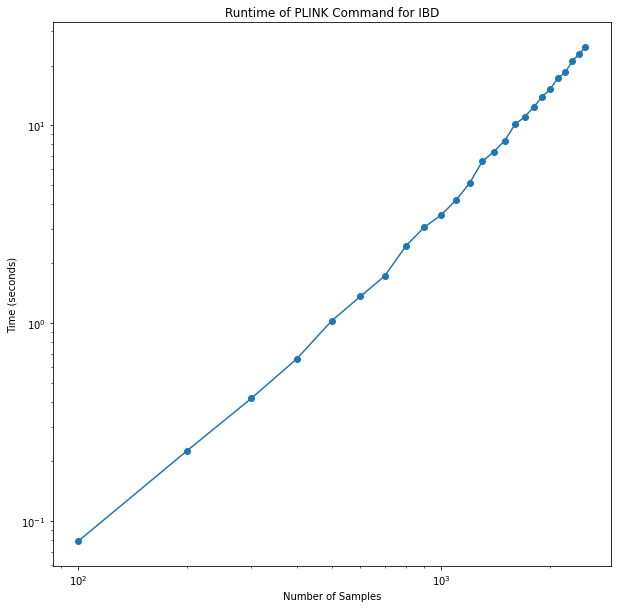

In [192]:
plink_sizes_sorted = sorted(plink_sizes, key = lambda x : x[0])
x = [item[0] for item in plink_sizes_sorted]
y = [item[1] for item in plink_sizes_sorted]
plt.plot(x, y, marker = 'o')

plt.xlabel("Number of Samples")
plt.ylabel("Time (seconds)")
plt.title("Runtime of PLINK Command for IBD")
plt.xscale('log')
plt.yscale('log')